In [2]:
#all packages and dataframes
import numpy as np
import classification
import os
import sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib import colors as mcolors
from matplotlib.lines import Line2D
import matplotlib.patches as patches
%matplotlib inline 
subList=['MSC01','MSC02','MSC03','MSC04','MSC05','MSC06','MSC07','MSC10']
taskList=['mem','glass','semantic','motor']
modelList=['Log','Ridge','SVM']
netList=['unassign','default', 'visual','fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon']
feature=[14808,10824,8736, 4620,5264,3151, 484, 4060, 2375,316, 564,45,21]
netRoi=dict([('unassign',14808),('default', 10824),('visual',8736),('fp', 4620),('dan',5264),('van',3151),('salience', 484),('co', 4060),('sm', 2375),('sm-lat', 316),('auditory', 564),('pmn',45),('pon',21)])
thisDir = os.path.expanduser('~/Desktop/Porteretal_taskprediction/output/results/')
figsDir = os.path.expanduser('~/Desktop/Porteretal_taskprediction/output/figures/')
sys.path.append('/Users/Alexis/Desktop/Porteretal_taskprediction/code/pyScripts/Predictions')
import reshape
Parcel_params = reshape.loadParcelParams('Gordon333')
# Gordan Palette
enmax_palette = Parcel_params['net_colors']
color_codes_wanted = Parcel_params['networks']
cdict = dict(zip(color_codes_wanted, [mcolors.to_rgba(c) for c in enmax_palette]))
mcolors.get_named_colors_mapping().update(cdict)
#MSC Palette
MSCList=['1','2','3','4','5','6','7','10']
MSC_colors=np.array([[0, 0, 0],[0.9, 0.9, 0],[0, 1, 0],[1, 0, 0],[0, 0, 1],[0.2, 1, 1],[1, 0, 1],[1, 0.5, 0]])
MSCdict=dict(zip(MSCList, [mcolors.to_rgba(m) for m in MSC_colors]))
mcolors.get_named_colors_mapping().update(MSCdict)
# 5th Percentile
def p5(x):
    return np.percentile(x,5)

# 90th Percentile
def p95(x):
    return np.percentile(x,95)
#Figure 2 all task vs rest and single task 
allTask_Binary=pd.read_csv(thisDir+'Ridge/ALL_Binary/acc.csv',usecols=['train_sub','same_sub','diff_sub'])
allTask_Binary=pd.melt(allTask_Binary,id_vars=['train_sub'],value_vars=['same_sub','diff_sub'],var_name='Analysis',value_name='acc')
single_task=pd.read_csv(thisDir+'Ridge/single_task/acc.csv',usecols=['train_sub','task','same_sub','diff_sub'])
single_task=pd.melt(single_task,id_vars=['train_sub','task'],value_vars=['same_sub','diff_sub'],var_name='Analysis',value_name='acc')

#Figure 3 multiclass
MC=pd.read_csv(thisDir+'Ridge/ALL_MC/acc.csv',usecols=['train','acc','Analysis'])
MC.drop_duplicates(inplace=True)
"""
#Figure 5 Blockwise 
blockwise=pd.read_csv(thisDir+'Ridge/ALL_Binary/blockNet_acc.csv')

#Figure 6 Feature Selection 
allTask_nets=pd.read_csv(thisDir+'Ridge/ALL_Binary/wholeNet_acc.csv')
single_task_nets=pd.read_csv(thisDir+'Ridge/single_task/wholeNet_acc.csv')
allTask_rand=pd.read_csv(thisDir+'Ridge/ALL_Binary/rdmNet_acc.csv')
single_task_rand=pd.read_csv(thisDir+'Ridge/single_task/rdmNet_acc.csv')


prc_single_task_sameSub=single_task_rand.groupby(['feature']).agg({'same_sub': [p5, p95]})
prc_single_task_sameSub = prc_single_task_sameSub.columns.droplevel()
prc_single_task_sameSub.reset_index(inplace=True)

prc_single_task_diffSub=single_task_rand.groupby(['feature']).agg({'diff_sub': [p5, p95]})
prc_single_task_diffSub = prc_single_task_diffSub.columns.droplevel()
prc_single_task_diffSub.reset_index(inplace=True)

prc_allTask_sameSub=allTask_rand.groupby(['feature']).agg({'same_sub': [p5, p95]})
prc_allTask_sameSub = prc_allTask_sameSub.columns.droplevel()
prc_allTask_sameSub.reset_index(inplace=True)

prc_allTask_diffSub=allTask_rand.groupby(['feature']).agg({'diff_sub': [p5, p95]})
prc_allTask_diffSub = prc_allTask_diffSub.columns.droplevel()
prc_allTask_diffSub.reset_index(inplace=True)

#Figure 7 Network parcellation
indNet=pd.read_csv(thisDir+'Ridge/ALL_IndNet/acc.csv',usecols=['train_sub','cv','ds'])
indNet=pd.melt(indNet,id_vars=['train_sub'],value_vars=['cv','ds'],var_name='Analysis',value_name='acc')

#Supp Figure 1 Manipulating days
manDays=pd.read_csv(thisDir+'Ridge/ALL_Binary/manDays.csv')
prc_manDays=manDays.groupby(['Days','Analysis']).agg({'acc': [p5, p95]})
prc_manDays.columns = percentiles_manDays.columns.droplevel()
prc_manDays.reset_index(inplace=True)
diff_prc=prc_manDays[prc_manDays.Analysis=='Different Person']
same_prc=prc_manDays[prc_manDays.Analysis=='Same Person']

#Supp Figure 2 Leave one sub out comparison
allTask_group=pd.read_csv(thisDir+'Ridge/ALL_Binary/groupwise_acc.csv')
mL_group=allTask_group.mean()
single_task_group=pd.read_csv(thisDir+'Ridge/single_task/groupwise_acc.csv')
single_task_group['Analysis']='group'
comp_single_task=single_task.groupby(['task','Analysis']).mean()
comp_single_task.reset_index(inplace=True)
compare_group=pd.concat([comp_single_task, single_task_group])

#Supp Figure 4 Different model comparison
Binary_clf=pd.DataFrame()
single_clf=pd.DataFrame()
MC_clf=pd.DataFrame()
for model in modelList:
    tmpallTask_Binary=pd.read_csv(thisDir+model+'/ALL_Binary/acc.csv',usecols=['train_sub','same_sub','diff_sub'])
    tmpsingle_task=pd.read_csv(thisDir+model+'/single_task/acc.csv',usecols=['train_sub','task','same_sub','diff_sub'])
    tmpMC=pd.read_csv(thisDir+model+'/ALL_MC/acc.csv',usecols=['train','acc','Analysis'])
    tmpMC.drop_duplicates(inplace=True)
    tmpallTask_Binary=pd.melt(tmpallTask_Binary,id_vars=['train_sub'],value_vars=['same_sub','diff_sub'],var_name='Analysis',value_name='acc')
    tmpallTask_Binary['clf']=model
    tmpsingle_task=pd.melt(tmpsingle_task,id_vars=['train_sub','task'],value_vars=['same_sub','diff_sub'],var_name='Analysis',value_name='acc')
    tmpsingle_task['clf']=model
    tmpMC['clf']=model
    Binary_clf=pd.concat([tmpallTask_Binary, Binary_clf])
    single_clf=pd.concat([tmpsingle_task, single_clf])
    MC_clf=pd.concat([tmpMC, MC_clf])
"""
#Supp Figure 6 Average MC and Supp Figure 7 ind MC confusion matrices are created when running multiclassAll

"\n#Figure 5 Blockwise \nblockwise=pd.read_csv(thisDir+'Ridge/ALL_Binary/blockNet_acc.csv')\n\n#Figure 6 Feature Selection \nallTask_nets=pd.read_csv(thisDir+'Ridge/ALL_Binary/wholeNet_acc.csv')\nsingle_task_nets=pd.read_csv(thisDir+'Ridge/single_task/wholeNet_acc.csv')\nallTask_rand=pd.read_csv(thisDir+'Ridge/ALL_Binary/rdmNet_acc.csv')\nsingle_task_rand=pd.read_csv(thisDir+'Ridge/single_task/rdmNet_acc.csv')\n\n\nprc_single_task_sameSub=single_task_rand.groupby(['feature']).agg({'same_sub': [p5, p95]})\nprc_single_task_sameSub = prc_single_task_sameSub.columns.droplevel()\nprc_single_task_sameSub.reset_index(inplace=True)\n\nprc_single_task_diffSub=single_task_rand.groupby(['feature']).agg({'diff_sub': [p5, p95]})\nprc_single_task_diffSub = prc_single_task_diffSub.columns.droplevel()\nprc_single_task_diffSub.reset_index(inplace=True)\n\nprc_allTask_sameSub=allTask_rand.groupby(['feature']).agg({'same_sub': [p5, p95]})\nprc_allTask_sameSub = prc_allTask_sameSub.columns.droplevel()\npr

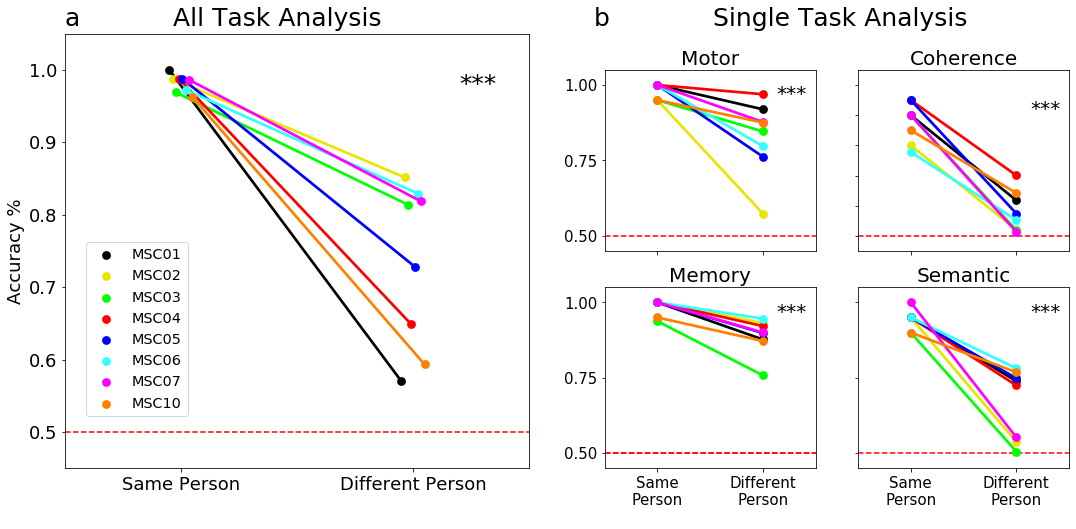

In [23]:
#Same Task (Fig 1)
fig = plt.figure(figsize=(15,8),constrained_layout=False)
gs00 = fig.add_gridspec(nrows=2, ncols=1, left=0.05, right=0.48,
                        wspace=0.05)

gs01 = fig.add_gridspec(nrows=3, ncols=2, left=0.55, right=0.98,height_ratios=[.001,1,1], hspace=.3)
fig.text(.05, .893, 'a',fontsize=25)
fig.text(.54, .893, 'b',fontsize=25)
fig.text(.15, .893, 'All Task Analysis',fontsize=25)
fig.text(.65, .893, 'Single Task Analysis',fontsize=25)


ax0=fig.add_subplot(gs00[0:,0])
ax=sns.pointplot(x="Analysis",y="acc", hue="train_sub", ax=ax0,ci=None, data=allTask_Binary, dodge=.1,order=['same_sub','diff_sub'],color='r', palette=['1','2','3','4','5','6','7','10'])
ax.set_xticklabels(['Same Person','Different Person'])
plt.text(1.2, .97, '***',fontsize=25)
y=[.5,.6,.7,.8,.9,1.0]
plt.yticks(y)
plt.ylabel("Accuracy %", fontsize=18)
ax.set(ylim=(.45, 1.05))
plt.legend(loc='center left',fontsize='x-large',bbox_to_anchor=(.03, .32))
ax.axhline(.5, ls='--',color='red')
plt.xlabel(' ')
ax.tick_params(labelsize=18)
#motor
ax1=fig.add_subplot(gs01[1,0])
ax=sns.pointplot(x="Analysis",y="acc", hue="train_sub", ci=None, data=single_task[single_task['task']=='motor'], ax=ax1, order=['same_sub','diff_sub'], color='r', palette=['1','2','3','4','5','6','7','10'])
plt.text(1.13, .95, '***',fontsize=20)
ax.set_xticklabels(['Same Person','Different Person'])
ax.legend_.remove()
ax.set_title('Motor', fontsize=20, pad=5)
plt.xlabel('')
plt.ylabel(' ')
y=[.5,.75,1.0]
plt.yticks(y)
ax.set(ylim=(.45, 1.05))
ax.tick_params('y',labelsize=15)
ax.axhline(.5, ls='--',color='red')
plt.setp(ax1.get_xticklabels(), visible=False)
#coherence
ax2=fig.add_subplot(gs01[1,1])
ax=sns.pointplot(x="Analysis",y="acc", hue="train_sub", ci=None, data=single_task[single_task['task']=='glass'], ax=ax2, order=['same_sub','diff_sub'], color='r', palette=['1','2','3','4','5','6','7','10'])
ax.legend_.remove()
ax.set_xticklabels(['Same Person','Different Person'])
ax.set(ylim=(.45, 1.05))
plt.text(1.13, .9, '***',fontsize=20)
ax.set_title('Coherence', fontsize=20, pad=5)
plt.setp(ax2.get_xticklabels(), visible=False)
plt.setp(ax2.get_yticklabels(), visible=False)
plt.ylabel('')
ax.axhline(.5, ls='--',color='red')
plt.xlabel('')
#memory
ax3=fig.add_subplot(gs01[2,0])
ax=sns.pointplot(x="Analysis",y="acc", hue="train_sub", ci=None, data=single_task[single_task['task']=='mem'],ax=ax3, order=['same_sub','diff_sub'], color='r', palette=['1','2','3','4','5','6','7','10'])
ax.legend_.remove()
ax.set_xticklabels(['Same Person','Different Person'])
ax.set(ylim=(.45, 1.05))
ax.set_title('Memory', fontsize=20, pad=5)
ax.axhline(.5, ls='--',color='red')
plt.ylabel(' ')
plt.xlabel(' ')
y=[.5,.75,1.0]
plt.yticks(y)
plt.text(1.13, .95, '***',fontsize=20)
ax.set_xticklabels(['Same\nPerson', 'Different\nPerson'])
ax4=fig.add_subplot(gs01[2,1],sharey=ax3)
ax.tick_params('x',labelsize=15)
ax.tick_params('y',labelsize=15)
ax.axhline(.5, ls='--',color='red')
ax=sns.pointplot(x="Analysis",y="acc", hue="train_sub", ci=None, data=single_task[single_task['task']=='semantic'],ax=ax4, order=['same_sub','diff_sub'], color='r', palette=['1','2','3','4','5','6','7','10'])
ax.set_title('Semantic', fontsize=20, pad=5)
ax.set_xticklabels(['Same Person','Different Person'])
plt.ylabel('')
ax.set(ylim=(.45, 1.05))
plt.xlabel('')
plt.text(1.13, .95, '***',fontsize=20)
ax.axhline(.5, ls='--',color='red')
ax.legend_.remove()
ax.tick_params('x',labelsize=15)
ax.set_xticklabels(['Same\nPerson', 'Different\nPerson'])
plt.setp(ax4.get_yticklabels(), visible=False)
plt.savefig(figsDir+'ALL_CVDS_point_plots.png', bbox_inches='tight')
#*** p<.001 **p<.01 *p<.05



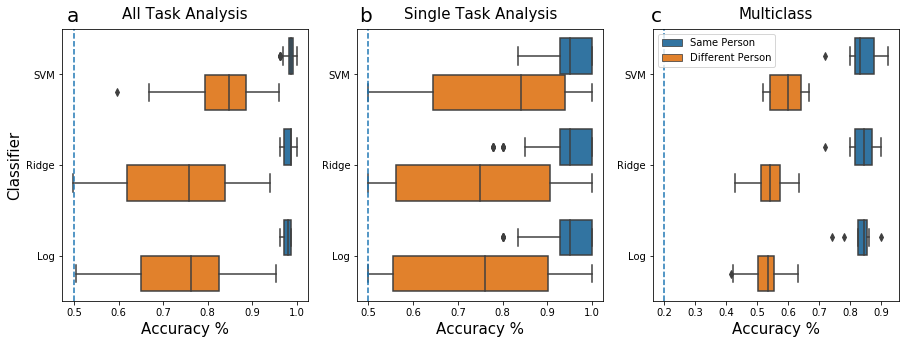

In [99]:
#Supplemental Figures
#S1
fig=plt.figure(figsize=(15,5), constrained_layout=True)
plt.rcParams['figure.constrained_layout.use'] = True
fig.text(.13, .9, 'a',fontsize=20)
fig.text(.4, .9, 'b',fontsize=20)
fig.text(.67, .9, 'c',fontsize=20)
#this is the model comparison for BS CV SS and DS
#Add grid space for subplots 1 rows by 2 columns
gs = gridspec.GridSpec(nrows=1, ncols=3,wspace=.2, hspace=.3)

ax0=fig.add_subplot(gs[0,0])
ax=sns.boxplot(x='acc',y='clf',hue='Analysis',data=Binary_clf,orient='h',hue_order=['same_sub','diff_sub'],ax=ax0)
ax.set_title('All Task Analysis',fontsize=15, pad=10)
plt.xlabel('Accuracy %',fontsize=15)
plt.ylabel('Classifier',fontsize=15)
ax0.legend_.remove()
ax0.axvline(.5, ls='--')
#ax0.legend(loc='lower left',fontsize=10)
ax1=fig.add_subplot(gs[0,1])
sns.boxplot(x='acc',y='clf',hue='Analysis',data=single_clf,orient='h',ax=ax1,hue_order=['same_sub','diff_sub'])
ax1.set_title('Single Task Analysis',fontsize=15, pad=10)
plt.xlabel('Accuracy %', fontsize=15)
plt.ylabel('Classifier')
ax1.legend_.remove()
ax1.axvline(.5, ls='--')
plt.ylabel(' ')

ax2=fig.add_subplot(gs[0,2])
sns.boxplot(x='acc',y='clf',hue='Analysis',data=MC_clf,orient='h',ax=ax2,hue_order=['Same Person','Different Person'])
ax2.set_title('Multiclass',fontsize=15, pad=10)
plt.xlabel('Accuracy %',fontsize=15)
plt.ylabel(' ')
ax2.axvline(.2, ls='--')
#ax2.legend_.remove()
ax2.legend(loc='upper left',fontsize=10)

plt.savefig(figsDir+'clf_comp_plots.png', bbox_inches='tight')


In [ ]:
#Supp Fig 7
ax=sns.lineplot(x='Days', y='acc', hue='Analysis', data=manDays)
ax.fill_between(diff_percent['Days'],diff_percent['p5'],diff_percent['p95'],alpha=.2,color='orange')
ax.fill_between(same_percent['Days'],same_percent['p5'],same_percent['p95'],alpha=.2,color='blue')
plt.ylabel("Accuracy %", fontsize=15)
plt.xlabel("Sample Pairs", fontsize=15)
plt.legend(loc='lower right',fontsize='medium')
plt.savefig(figsDir+'samplePairplots.png', bbox_inches='tight')

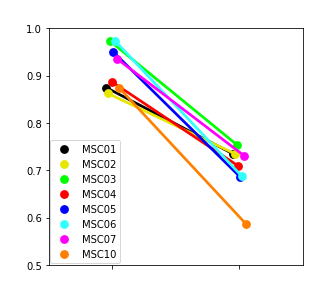

In [35]:
fig=plt.figure(figsize=(10,10), constrained_layout=True)
plt.rcParams['figure.constrained_layout.use'] = True
gs = gridspec.GridSpec(nrows=2, ncols=2,wspace=.2,hspace=.3)
ax2=fig.add_subplot(gs[0,0])
ax=sns.pointplot(x="Analysis",y="acc", hue="train_sub",ci=None, data=indNet, dodge=.1,order=['cv','ds'],color='r', palette=['1','2','3','4','5','6','7','10'])
ax.set_title(' ', fontsize=15, pad=10)
y=[.5,.6,.7,.8,.9,1.0]
plt.yticks(y)
plt.ylabel(" ", fontsize=15)
plt.xlabel(' ')
plt.legend(bbox_to_anchor=(.3, .55),loc='upper right',fontsize='medium')
ax.set(xticklabels=[])
plt.savefig(figsDir+'indNet_Plot.png', bbox_inches='tight')

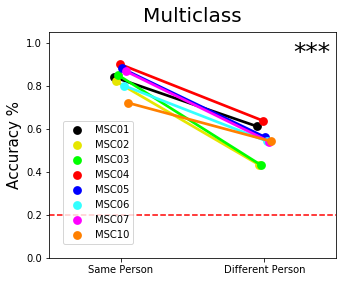

In [40]:
fig = plt.figure()
ax0 = fig.add_subplot(111, aspect=1.5) 
ax=sns.pointplot(x="Analysis",y="acc", hue="train",ci=None, data=MC, dodge=.1,order=['Same Person','Different Person'],color='r', palette=['1','2','3','4','5','6','7','10'],ax=ax0)
plt.text(1.2, .92, '***',fontsize=25)
ax.set_title('Multiclass', fontsize=20, pad=10)
#y=[.5,.6,.7,.8,.9,1.0]
#plt.yticks(y)
plt.ylabel("Accuracy %", fontsize=15)
ax.axhline(.2,color='red',linestyle='--')
plt.legend(loc='lower left',fontsize='medium',bbox_to_anchor=(.03, .04))
plt.xlabel(' ')

ax.set(ylim=(0, 1.05))
plt.savefig(figsDir+'MC_Plot.png', bbox_inches='tight')

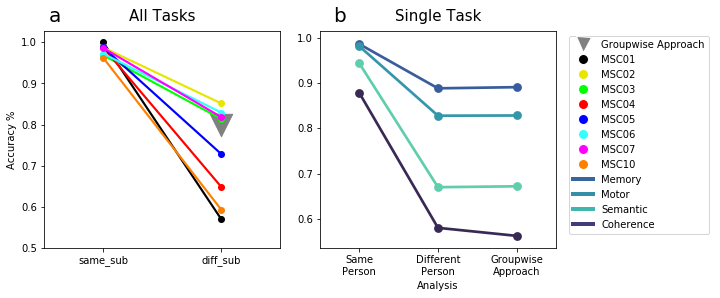

In [58]:
#Groupwise comparison
legend_elements = [Line2D([0], [0], color='w',markerfacecolor='gray', marker='v',markersize=15,label='Groupwise Approach'),
                    Line2D([0], [0],  color='w',markerfacecolor=MSCdict['1'],marker='o',markersize=10,label='MSC01'),
                  Line2D([0], [0],  color='w',markerfacecolor=MSCdict['2'],marker='o',markersize=10,label='MSC02'),
                  Line2D([0], [0],  color='w',markerfacecolor=MSCdict['3'],marker='o',markersize=10,label='MSC03'),
                  Line2D([0], [0],  color='w',markerfacecolor=MSCdict['4'],marker='o',markersize=10,label='MSC04'),
                  Line2D([0], [0],  color='w',markerfacecolor=MSCdict['5'],marker='o',markersize=10,label='MSC05'),
                  Line2D([0], [0],  color='w',markerfacecolor=MSCdict['6'],marker='o',markersize=10,label='MSC06'),
                  Line2D([0], [0],  color='w',markerfacecolor=MSCdict['7'],marker='o',markersize=10,label='MSC07'),
                  Line2D([0], [0],  color='w',markerfacecolor=MSCdict['10'],marker='o',markersize=10,label='MSC10'),
                  Line2D([0], [0], color='#37659e', lw=4,label='Memory'),
                   Line2D([0], [0], color='#348fa7', lw=4, label='Motor'),
                Line2D([0], [0], color='#40b7ad', lw=4,label='Semantic'),
                Line2D([0], [0], color='#413d7b', lw=4,label='Coherence')]
fig=plt.figure(figsize=(12,4))
gs = gridspec.GridSpec(nrows=1, ncols=3,width_ratios=[2,2,1])
fig.text(.13, .91, 'a',fontsize=20)
fig.text(.46, .91, 'b',fontsize=20)
ax1=fig.add_subplot(gs[0,1])
ax=sns.pointplot(x='Analysis',y='acc',hue='task',data=compare_group,legend=False,order=['same_sub','diff_sub','group'],palette='mako',ax=ax1)
plt.ylabel(" ", fontsize=10)
ax.set_title('Single Task', fontsize=15, pad=10)
ax.legend_.remove()
ax.set_xticklabels(['Same\nPerson', 'Different\nPerson','Groupwise\nApproach'])
ax2=fig.add_subplot(gs[0,0])
ax2.scatter(x=1,y=mL_group,s=500,color='gray',marker="v")
ax=sns.pointplot(x="Analysis",y="acc", hue="train_sub",ci=None, scale=.8,data=allTask_Binary,order=['same_sub','diff_sub'],color='r', palette=['1','2','3','4','5','6','7','10'],ax=ax2)
ax.set_title('All Tasks', fontsize=15, pad=10)
y=[.5,.6,.7,.8,.9,1.0]
plt.yticks(y)
plt.ylabel("Accuracy %", fontsize=10)
plt.xlabel(' ')
ax.legend_.remove()
ax9= fig.add_subplot(gs[0, 2])
ax9.set_axis_off()
plt.setp(ax9.get_yticklabels(), visible=False)
plt.setp(ax9.get_xticklabels(), visible=False)
ax9.set_xticks([])
ax9.set_yticks([])
ax9.legend(handles=legend_elements)
plt.savefig(figsDir+'groupwise_mL_compPlot.png', bbox_inches='tight')



ValueError: Could not interpret input 'feature'

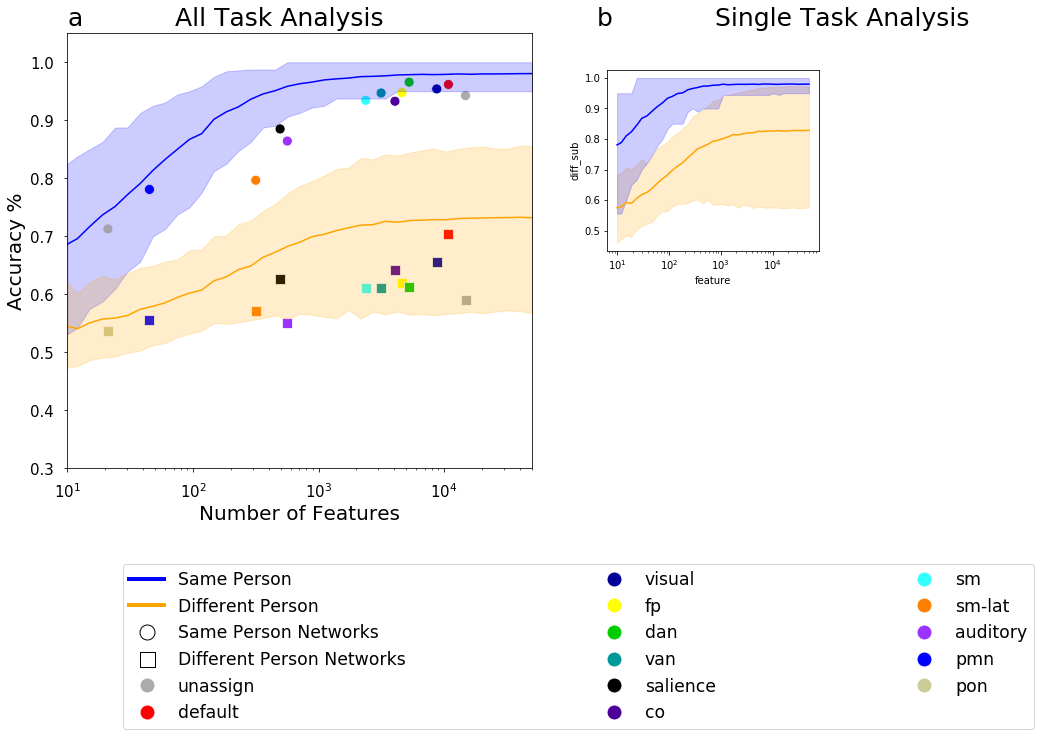

In [14]:
CV_z=pd.read_csv(randDir+'CV/zscore_splitTask.csv')
DS_z=pd.read_csv(randDir+'DS/zscore_splitTask.csv')

percentiles_CV_task=rand_DS.groupby(['feature','task']).agg({'same_sub': [p5, p95]})
percentiles_CV_task.columns = percentiles_CV_task.columns.droplevel()
percentiles_CV_task.reset_index(inplace=True)


percentiles_DS_task=rand_DS.groupby(['feature','task']).agg({'diff_sub': [p5, p95]})
percentiles_DS_task.columns = percentiles_DS_task.columns.droplevel()
percentiles_DS_task.reset_index(inplace=True)


fig = plt.figure(figsize=(15,8),constrained_layout=False)
gs00 = fig.add_gridspec(nrows=2, ncols=1, left=0.05, right=0.48,
                        wspace=0.05)
gs01 = fig.add_gridspec(nrows=3, ncols=2, left=0.55, right=0.98,height_ratios=[.001,1,1], hspace=.3)



fig.text(.05, .893, 'a',fontsize=25)
fig.text(.54, .893, 'b',fontsize=25)
fig.text(.15, .893, 'All Task Analysis',fontsize=25)
fig.text(.65, .893, 'Single Task Analysis',fontsize=25)


ax6=fig.add_subplot(gs00[0:,0])
ax = sns.lineplot(x="feature", y='same_sub',data=rand_ALL, ci=None, ax=ax6,color='blue')
ax = sns.lineplot(x="feature", y='diff_sub',data=rand_ALL, ci=None,ax=ax6,color='orange')
g=sns.scatterplot(x='feature', y='same_sub', hue='Network', data=ALL_z, ax=ax6, color='r',legend=False,s=100,hue_order=["unassign","default", "visual",'fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon'],palette=["unassign","default", "visual",'fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon'])
g=sns.scatterplot(x='feature', y='diff_sub', hue='Network', data=ALL_z, ax=ax6, color='r',legend=False,s=100,hue_order=["unassign","default", "visual",'fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon'],palette=["unassign","default", "visual",'fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon'],marker='s')
ax.fill_between(percentiles_ALL_SS['feature'],percentiles_ALL_SS['p5'],percentiles_ALL_SS['p95'],alpha=.2,color='blue')
ax.fill_between(percentiles_ALL_DS['feature'],percentiles_ALL_DS['p5'],percentiles_ALL_DS['p95'],alpha=.2,color='orange')
ax6.set_ylabel("Accuracy %",fontsize=20)
ax6.set_xlabel('Number of Features',fontsize=20)
ax6.set(ylim=(0, 1),xlim=(10,50000))
ax6.tick_params(labelsize=15,pad=10)
ax6.set(ylim=(.3, 1.05),xlim=(10,50000))
#ax6.set_title('All Task Analysis',fontsize=20, pad=10)
ax6.set(xscale="log")


ax6.legend(handles=comb_legend_elements,bbox_to_anchor=(.1,-1.2,2,1),mode='expand',ncol=3,fontsize='xx-large')

#CV split up tasks
ax1=fig.add_subplot(gs01[1,0])
ax = sns.lineplot(x="feature", y='same_sub',data=rand_DS[rand_DS['task']=='motor'],ci=None, color='blue',ax=ax1)
sns.lineplot(x="feature", y='diff_sub',data=rand_DS[rand_DS['task']=='motor'],ci=None, color='orange',ax=ax1)
ax.fill_between(percentiles_DS_task[percentiles_DS_task['task']=='motor'].feature,percentiles_DS_task[percentiles_DS_task['task']=='motor'].p5,percentiles_DS_task[percentiles_DS_task['task']=='motor'].p95,alpha=.2,color='orange')
ax.fill_between(percentiles_CV_task[percentiles_CV_task['task']=='motor'].feature,percentiles_CV_task[percentiles_CV_task['task']=='motor'].p5,percentiles_CV_task[percentiles_CV_task['task']=='motor'].p95,alpha=.2,color='blue')
ax.set(xscale="log")
g=sns.scatterplot(x='feature', y='acc', hue='network', data=CV_z[CV_z['task']=='motor'],ax=ax1, color='r',s=100,legend=False,palette=["unassign","default", "visual",'fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon'],hue_order=["unassign","default", "visual",'fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon'])
g=sns.scatterplot(x='feature', y='acc', hue='network', data=DS_z[DS_z['task']=='motor'],ax=ax1, color='r',s=100,legend=False,palette=["unassign","default", "visual",'fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon'],marker='s',hue_order=["unassign","default", "visual",'fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon'])
ax.set_title('Motor',fontsize=20)
ax.set_ylabel("Accuracy %", fontsize=20)
ax.set_xlabel('')
ax.set(ylim=(.5, 1),xlim=(10,50000))
plt.setp(ax1.get_xticklabels(), visible=False)


ax2=fig.add_subplot(gs01[1,1])
ax = sns.lineplot(x="feature", y='same_sub',data=rand_DS[rand_DS['task']=='glass'],ci=None, color='blue',ax=ax2)
sns.lineplot(x="feature", y='diff_sub',data=rand_DS[rand_DS['task']=='glass'],ci=None, color='orange',ax=ax2)
ax.fill_between(percentiles_DS_task[percentiles_DS_task['task']=='glass'].feature,percentiles_DS_task[percentiles_DS_task['task']=='glass'].p5,percentiles_DS_task[percentiles_DS_task['task']=='glass'].p95,alpha=.2,color='orange')
ax.fill_between(percentiles_CV_task[percentiles_CV_task['task']=='glass'].feature,percentiles_CV_task[percentiles_CV_task['task']=='glass'].p5,percentiles_CV_task[percentiles_CV_task['task']=='glass'].p95,alpha=.2,color='blue')
ax.set(xscale="log")
g=sns.scatterplot(x='feature', y='acc', hue='network', data=CV_z[CV_z['task']=='glass'],ax=ax2, color='r',s=100,legend=False,palette=["unassign","default", "visual",'fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon'],hue_order=["unassign","default", "visual",'fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon'])
g=sns.scatterplot(x='feature', y='acc', hue='network', data=DS_z[DS_z['task']=='glass'],ax=ax2, color='r',s=100,legend=False,palette=["unassign","default", "visual",'fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon'],marker='s',hue_order=["unassign","default", "visual",'fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon'])

ax.set_title('Coherence',fontsize=20)
ax.set_ylabel("")
ax.set_xlabel('')
ax.set(ylim=(.5, 1),xlim=(10,50000))
plt.setp(ax2.get_xticklabels(), visible=False)
ax3=fig.add_subplot(gs01[2,0])
ax = sns.lineplot(x="feature", y='same_sub',data=rand_DS[rand_DS['task']=='mem'],ci=None, color='blue',ax=ax3)
sns.lineplot(x="feature", y='diff_sub',data=rand_DS[rand_DS['task']=='mem'],ci=None, color='orange',ax=ax3)
ax.fill_between(percentiles_DS_task[percentiles_DS_task['task']=='mem'].feature,percentiles_DS_task[percentiles_DS_task['task']=='mem'].p5,percentiles_DS_task[percentiles_DS_task['task']=='mem'].p95,alpha=.2,color='orange')
ax.fill_between(percentiles_CV_task[percentiles_CV_task['task']=='mem'].feature,percentiles_CV_task[percentiles_CV_task['task']=='mem'].p5,percentiles_CV_task[percentiles_CV_task['task']=='mem'].p95,alpha=.2,color='blue')
ax.set(xscale="log")
g=sns.scatterplot(x='feature', y='acc', hue='network', data=CV_z[CV_z['task']=='mem'], ax=ax3,color='r',s=100,legend=False,palette=["unassign","default", "visual",'fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon'],hue_order=["unassign","default", "visual",'fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon'])
g=sns.scatterplot(x='feature', y='acc', hue='network', data=DS_z[DS_z['task']=='mem'],ax=ax3, color='r',s=100,legend=False,palette=["unassign","default", "visual",'fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon'],marker='s',hue_order=["unassign","default", "visual",'fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon'])
ax.set_title('Memory',fontsize=20)
ax.set_ylabel("Accuracy %", fontsize=20)
ax.set_xlabel('')
ax.set(ylim=(.5, 1),xlim=(10,50000))




ax4=fig.add_subplot(gs01[2,1])
ax = sns.lineplot(x="feature", y='same_sub',data=rand_DS[rand_DS['task']=='semantic'],ci=None, color='blue',ax=ax4)
sns.lineplot(x="feature", y='diff_sub',data=rand_DS[rand_DS['task']=='semantic'],ci=None, color='orange',ax=ax4)
ax.fill_between(percentiles_DS_task[percentiles_DS_task['task']=='semantic'].feature,percentiles_DS_task[percentiles_DS_task['task']=='semantic'].p5,percentiles_DS_task[percentiles_DS_task['task']=='semantic'].p95,alpha=.2,color='orange')
ax.fill_between(percentiles_CV_task[percentiles_CV_task['task']=='semantic'].feature,percentiles_CV_task[percentiles_CV_task['task']=='semantic'].p5,percentiles_CV_task[percentiles_CV_task['task']=='semantic'].p95,alpha=.2,color='blue')
ax.set(xscale="log")
g=sns.scatterplot(x='feature', y='acc', hue='network', data=CV_z[CV_z['task']=='semantic'],ax=ax4, color='r',s=100,legend=False,palette=["unassign","default", "visual",'fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon'],hue_order=["unassign","default", "visual",'fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon'])
g=sns.scatterplot(x='feature', y='acc', hue='network', data=DS_z[DS_z['task']=='semantic'],ax=ax4, color='r',s=100,legend=False,palette=["unassign","default", "visual",'fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon'],marker='s',hue_order=["unassign","default", "visual",'fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon'])
ax.set_title('Semantic',fontsize=20)
ax.set_ylabel("")
ax.set_xlabel('')
ax.set(ylim=(.5, 1),xlim=(10,50000))

plt.savefig(thisDir+'output/FigsFinal/split_task_feature_plots.png', bbox_inches='tight')



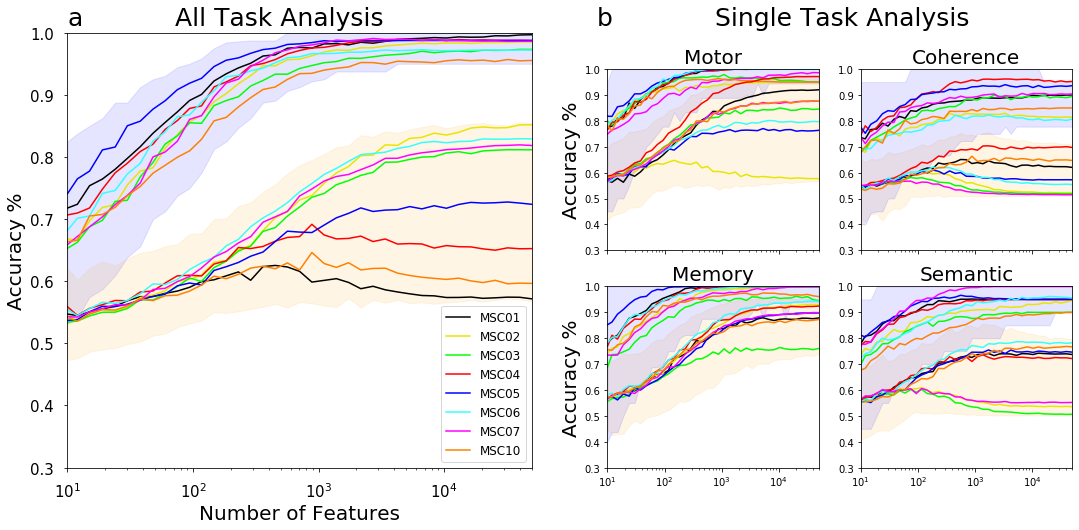

In [60]:
fig = plt.figure(figsize=(15,8),constrained_layout=False)
gs00 = fig.add_gridspec(nrows=2, ncols=1, left=0.05, right=0.48,
                        wspace=0.05)
gs01 = fig.add_gridspec(nrows=3, ncols=2, left=0.55, right=0.98,height_ratios=[.001,1,1], hspace=.3)



fig.text(.05, .893, 'a',fontsize=25)
fig.text(.54, .893, 'b',fontsize=25)
fig.text(.15, .893, 'All Task Analysis',fontsize=25)
fig.text(.65, .893, 'Single Task Analysis',fontsize=25)


ax6=fig.add_subplot(gs00[0:,0])
ax = sns.lineplot(x="feature", y='same_sub',data=rand_ALL,hue='train', ci=None, ax=ax6,color='r', palette=['1','2','3','4','5','6','7','10'])
ax = sns.lineplot(x="feature", y='diff_sub',data=rand_ALL,hue='train', ci=None,ax=ax6,legend=False,color='r', palette=['1','2','3','4','5','6','7','10'])
ax.fill_between(percentiles_ALL_SS['feature'],percentiles_ALL_SS['p5'],percentiles_ALL_SS['p95'],alpha=.1,color='blue')
ax.fill_between(percentiles_ALL_DS['feature'],percentiles_ALL_DS['p5'],percentiles_ALL_DS['p95'],alpha=.1,color='orange')
ax6.set_ylabel("Accuracy %",fontsize=20)
ax6.set_xlabel('Number of Features',fontsize=20)
ax6.tick_params(labelsize=15,pad=10)
ax6.set(ylim=(.3, 1),xlim=(10,50000))
ax6.set(xscale="log")
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[1:], labels=labels[1:],loc='lower right',fontsize='large')

#CV split up tasks
ax1=fig.add_subplot(gs01[1,0])
ax = sns.lineplot(x="feature", y='same_sub',data=rand_DS[rand_DS['task']=='motor'],hue='train',ci=None,ax=ax1,legend=False,color='r', palette=['1','2','3','4','5','6','7','10'])
sns.lineplot(x="feature", y='diff_sub',data=rand_DS[rand_DS['task']=='motor'],hue='train',ci=None,ax=ax1,legend=False,color='r', palette=['1','2','3','4','5','6','7','10'])
ax.fill_between(percentiles_DS_task[percentiles_DS_task['task']=='motor'].feature,percentiles_DS_task[percentiles_DS_task['task']=='motor'].p5,percentiles_DS_task[percentiles_DS_task['task']=='motor'].p95,alpha=.1,color='orange')
ax.fill_between(percentiles_CV_task[percentiles_CV_task['task']=='motor'].feature,percentiles_CV_task[percentiles_CV_task['task']=='motor'].p5,percentiles_CV_task[percentiles_CV_task['task']=='motor'].p95,alpha=.1,color='blue')
ax.set(xscale="log")
ax.set_title('Motor',fontsize=20)
ax.set_ylabel("Accuracy %", fontsize=20)
ax.set_xlabel('')
ax.set(ylim=(.3, 1),xlim=(10,50000))
plt.setp(ax1.get_xticklabels(), visible=False)


ax2=fig.add_subplot(gs01[1,1])
ax = sns.lineplot(x="feature", y='same_sub',data=rand_DS[rand_DS['task']=='glass'],hue='train',ci=None, ax=ax2,legend=False,color='r', palette=['1','2','3','4','5','6','7','10'])
sns.lineplot(x="feature", y='diff_sub',data=rand_DS[rand_DS['task']=='glass'],hue='train',ci=None,ax=ax2,legend=False,color='r', palette=['1','2','3','4','5','6','7','10'])
ax.fill_between(percentiles_DS_task[percentiles_DS_task['task']=='glass'].feature,percentiles_DS_task[percentiles_DS_task['task']=='glass'].p5,percentiles_DS_task[percentiles_DS_task['task']=='glass'].p95,alpha=.1,color='orange')
ax.fill_between(percentiles_CV_task[percentiles_CV_task['task']=='glass'].feature,percentiles_CV_task[percentiles_CV_task['task']=='glass'].p5,percentiles_CV_task[percentiles_CV_task['task']=='glass'].p95,alpha=.1,color='blue')
ax.set(xscale="log")
ax.set_title('Coherence',fontsize=20)
ax.set_ylabel("")
ax.set_xlabel('')
ax.set(ylim=(.3, 1),xlim=(10,50000))
plt.setp(ax2.get_xticklabels(), visible=False)
ax3=fig.add_subplot(gs01[2,0])
ax = sns.lineplot(x="feature", y='same_sub',data=rand_DS[rand_DS['task']=='mem'],hue='train',ci=None, ax=ax3,legend=False,color='r', palette=['1','2','3','4','5','6','7','10'])
sns.lineplot(x="feature", y='diff_sub',data=rand_DS[rand_DS['task']=='mem'],hue='train',ci=None, ax=ax3,legend=False,color='r', palette=['1','2','3','4','5','6','7','10'])
ax.fill_between(percentiles_DS_task[percentiles_DS_task['task']=='mem'].feature,percentiles_DS_task[percentiles_DS_task['task']=='mem'].p5,percentiles_DS_task[percentiles_DS_task['task']=='mem'].p95,alpha=.1,color='orange')
ax.fill_between(percentiles_CV_task[percentiles_CV_task['task']=='mem'].feature,percentiles_CV_task[percentiles_CV_task['task']=='mem'].p5,percentiles_CV_task[percentiles_CV_task['task']=='mem'].p95,alpha=.1,color='blue')
ax.set(xscale="log")
ax.set_title('Memory',fontsize=20)
ax.set_ylabel("Accuracy %", fontsize=20)
ax.set_xlabel('')
ax.set(ylim=(.3, 1),xlim=(10,50000))




ax4=fig.add_subplot(gs01[2,1])
ax = sns.lineplot(x="feature", y='same_sub',data=rand_DS[rand_DS['task']=='semantic'],hue='train',ci=None,ax=ax4,legend=False,color='r', palette=['1','2','3','4','5','6','7','10'])
sns.lineplot(x="feature", y='diff_sub',data=rand_DS[rand_DS['task']=='semantic'],hue='train',ci=None,ax=ax4,legend=False,color='r', palette=['1','2','3','4','5','6','7','10'])
ax.fill_between(percentiles_DS_task[percentiles_DS_task['task']=='semantic'].feature,percentiles_DS_task[percentiles_DS_task['task']=='semantic'].p5,percentiles_DS_task[percentiles_DS_task['task']=='semantic'].p95,alpha=.1,color='orange')
ax.fill_between(percentiles_CV_task[percentiles_CV_task['task']=='semantic'].feature,percentiles_CV_task[percentiles_CV_task['task']=='semantic'].p5,percentiles_CV_task[percentiles_CV_task['task']=='semantic'].p95,alpha=.1,color='blue')
ax.set(xscale="log")
ax.set_title('Semantic',fontsize=20)
ax.set_ylabel("")
ax.set_xlabel('')
ax.set(ylim=(.3, 1),xlim=(10,50000))
plt.savefig(figsDir+'split_sub_feature_plots.png', bbox_inches='tight')



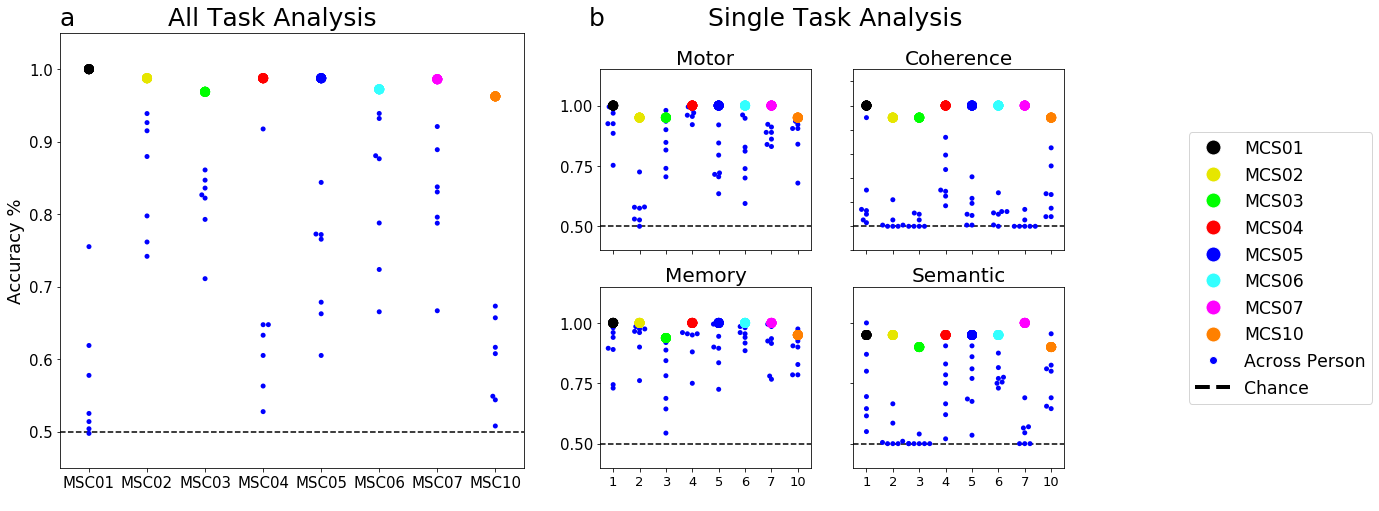

In [82]:
comb_legend=[Line2D([0], [0],  color='w',markerfacecolor=MSCdict['1'],marker='o',markersize=15,label='MCS01'),
                  Line2D([0], [0],  color='w',markerfacecolor=MSCdict['2'],marker='o',markersize=15,label='MCS02'),
                  Line2D([0], [0],  color='w',markerfacecolor=MSCdict['3'],marker='o',markersize=15,label='MCS03'),
                  Line2D([0], [0],  color='w',markerfacecolor=MSCdict['4'],marker='o',markersize=15,label='MCS04'),
                  Line2D([0], [0],  color='w',markerfacecolor=MSCdict['5'],marker='o',markersize=15,label='MCS05'),
                  Line2D([0], [0],  color='w',markerfacecolor=MSCdict['6'],marker='o',markersize=15,label='MCS06'),
                  Line2D([0], [0],  color='w',markerfacecolor=MSCdict['7'],marker='o',markersize=15,label='MCS07'),
                  Line2D([0], [0],  color='w',markerfacecolor=MSCdict['10'],marker='o',markersize=15,label='MCS10'),
                    Line2D([0], [0], color='w', markerfacecolor='blue',marker='o',markersize=8,label='Across Person'),
                    Line2D([0], [0], color='black', lw=4, linestyle='--',label='Chance')]


fig = plt.figure(figsize=(15,8),constrained_layout=False)

gs00 = fig.add_gridspec(nrows=2, ncols=1, left=0.05, right=0.48, wspace=0.05)
gs01 = fig.add_gridspec(nrows=3, ncols=2, left=0.55, right=0.98,height_ratios=[.001,1,1], hspace=.3)

fig.text(.05, .893, 'a',fontsize=25)
fig.text(.54, .893, 'b',fontsize=25)
fig.text(.15, .893, 'All Task Analysis',fontsize=25)
fig.text(.65, .893, 'Single Task Analysis',fontsize=25)


ax0=fig.add_subplot(gs00[0:,0])#:2])
ax=sns.swarmplot(x="train_sub",y="acc",  data=allTask_Binary[allTask_Binary['Analysis']=='diff_sub'],ax=ax0,color='blue')
sns.stripplot(x='train_sub',y='acc',data=allTask_Binary[allTask_Binary['Analysis']=='same_sub'],color='r', ax=ax0,palette=['1','2','3','4','5','6','7','10'],size=10,jitter=False)
y=[.5,.6,.7,.8,.9,1.0]
plt.yticks(y)
ax.set(ylim=(.45, 1.05))
ax.axhline(.5,color='black',linestyle="--")
plt.ylabel("Accuracy %", fontsize=18)
plt.xlabel(' ')
ax.tick_params(labelsize=15)
#motor
ax1=fig.add_subplot(gs01[1,0])
ax=sns.swarmplot(x=single_task.loc[(single_task['Analysis']=='diff_sub') & (single_task['task']=='motor'),'train_sub'].values,y=single_task.loc[(single_task['Analysis']=='diff_sub') & (single_task['task']=='motor'),'acc'].values, ax=ax1, color='blue')
sns.stripplot(x=single_task.loc[(single_task['Analysis']=='same_sub') & (single_task['task']=='motor'),'train_sub'].values,y=single_task.loc[(single_task['Analysis']=='same_sub') & (single_task['task']=='motor'),'acc'].values,color='r', ax=ax1,palette=['1','2','3','4','5','6','7','10'],size=10,jitter=False)
ax.set_title('Motor', fontsize=20, pad=5)
ax.axhline(.5,color='black',linestyle="--")
plt.xlabel('')
plt.ylabel(' ')
y=[.5,.75,1.0]
plt.yticks(y)
ax.set(ylim=(.4, 1.15))
ax.tick_params('y',labelsize=15)
plt.setp(ax1.get_xticklabels(), visible=False)
L1=plt.legend(handles=comb_legend,bbox_to_anchor=(3.7, .7),fontsize='xx-large')
#coherence
ax2=fig.add_subplot(gs01[1,1])
ax=sns.swarmplot(x=single_task.loc[(single_task['Analysis']=='diff_sub') & (single_task['task']=='glass'),'train_sub'].values,y=single_task.loc[(single_task['Analysis']=='diff_sub') & (single_task['task']=='glass'),'acc'].values, ax=ax2, color='blue')
sns.stripplot(x=single_task.loc[(single_task['Analysis']=='same_sub') & (single_task['task']=='motor'),'train_sub'].values,y=single_task.loc[(single_task['Analysis']=='same_sub') & (single_task['task']=='motor'),'acc'].values,color='r', ax=ax2,palette=['1','2','3','4','5','6','7','10'],size=10,jitter=False)
ax.axhline(.5,color='black',linestyle="--")
ax.set_title('Coherence', fontsize=20, pad=5)
ax.set(ylim=(.4, 1.15))
plt.setp(ax2.get_xticklabels(), visible=False)
plt.setp(ax2.get_yticklabels(), visible=False)
plt.ylabel('')
plt.xlabel('')
#memory
ax3=fig.add_subplot(gs01[2,0])
ax=sns.swarmplot(x=single_task.loc[(single_task['Analysis']=='diff_sub') & (single_task['task']=='mem'),'train_sub'].values,y=single_task.loc[(single_task['Analysis']=='diff_sub') & (single_task['task']=='mem'),'acc'].values, ax=ax3, color='blue')
sns.stripplot(x=single_task.loc[(single_task['Analysis']=='same_sub') & (single_task['task']=='mem'),'train_sub'].values,y=single_task.loc[(single_task['Analysis']=='same_sub') & (single_task['task']=='mem'),'acc'].values,color='r', ax=ax3,palette=['1','2','3','4','5','6','7','10'],size=10,jitter=False)
ax.set_title('Memory', fontsize=20, pad=5)
ax.axhline(.5,color='black',linestyle="--")
plt.ylabel(' ')
ax.set(ylim=(.4, 1.15))
plt.xlabel(' ')
ax.set_xticklabels(['1', '2','3','4','5','6','7','10'])
y=[.5,.75,1.0]
plt.yticks(y)
ax4=fig.add_subplot(gs01[2,1],sharey=ax3)
ax.tick_params('x',labelsize=13)
ax.tick_params('y',labelsize=15)
ax=sns.swarmplot(x=single_task.loc[(single_task['Analysis']=='diff_sub') & (single_task['task']=='semantic'),'train_sub'].values,y=single_task.loc[(single_task['Analysis']=='diff_sub') & (single_task['task']=='semantic'),'acc'].values, ax=ax4, color='blue')
sns.stripplot(x=single_task.loc[(single_task['Analysis']=='same_sub') & (single_task['task']=='semantic'),'train_sub'].values,y=single_task.loc[(single_task['Analysis']=='same_sub') & (single_task['task']=='semantic'),'acc'].values,color='r', ax=ax4,palette=['1','2','3','4','5','6','7','10'],size=10,jitter=False)
ax.set_title('Semantic', fontsize=20, pad=5)
plt.ylabel('')
plt.xlabel('')
ax.axhline(.5,color='black',linestyle="--")
ax.set(ylim=(.4, 1.15))
ax.set_xticklabels(['1', '2','3','4','5','6','7','10'])
ax.tick_params('x',labelsize=13)
plt.setp(ax4.get_yticklabels(), visible=False)
plt.savefig(figsDir+'ALL_plots_swarm.png', bbox_inches='tight')
#*** p<.001 **p<.01 *p<.05



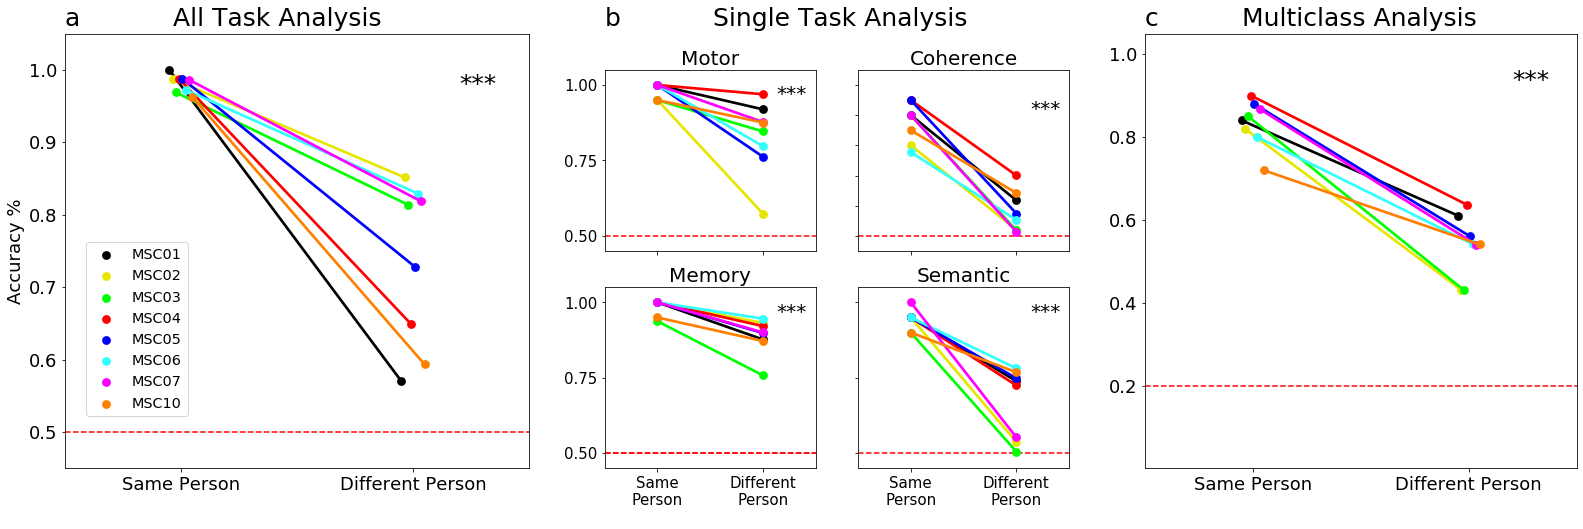

In [31]:
#Same Task (Fig 1)
fig = plt.figure(figsize=(15,8),constrained_layout=False)
gs00 = fig.add_gridspec(nrows=2, ncols=1, left=0.05, right=0.48,
                        wspace=0.05)
gs02 = fig.add_gridspec(nrows=2, ncols=1, left=1.05, right=1.45,
                        wspace=0.05)
gs01 = fig.add_gridspec(nrows=3, ncols=2, left=.55, right=.98,height_ratios=[.001,1,1], hspace=.3)
fig.text(.05, .893, 'a',fontsize=25)
fig.text(.55, .893, 'b',fontsize=25)
fig.text(1.05, .893, 'c',fontsize=25)
fig.text(.15, .893, 'All Task Analysis',fontsize=25)
fig.text(.65, .893, 'Single Task Analysis',fontsize=25)
fig.text(1.14, .893, 'Multiclass Analysis',fontsize=25)


ax0=fig.add_subplot(gs00[0:,0])
ax=sns.pointplot(x="Analysis",y="acc", hue="train_sub", ax=ax0,ci=None, data=allTask_Binary, dodge=.1,order=['same_sub','diff_sub'],color='r', palette=['1','2','3','4','5','6','7','10'])
ax.set_xticklabels(['Same Person','Different Person'])
plt.text(1.2, .97, '***',fontsize=25)
y=[.5,.6,.7,.8,.9,1.0]
plt.yticks(y)
plt.ylabel("Accuracy %", fontsize=18)
ax.set(ylim=(.45, 1.05))
plt.legend(loc='center left',fontsize='x-large',bbox_to_anchor=(.03, .32))
ax.axhline(.5, ls='--',color='red')
plt.xlabel(' ')
ax.tick_params(labelsize=18)

ax00=fig.add_subplot(gs02[0:,0])
ax=sns.pointplot(x="Analysis",y="acc", hue="train",ci=None, data=MC,ax=ax00, dodge=.1,order=['Same Person','Different Person'],color='r', palette=['1','2','3','4','5','6','7','10'])
plt.text(1.2, .92, '***',fontsize=25)
#ax.set_title('Multiclass', fontsize=20, pad=10)
y=[.2,.4,.6,.8,1.0]
plt.yticks(y)
plt.ylabel(" ", fontsize=15)
ax.axhline(.2,color='red',linestyle='--')
#plt.legend(loc='lower left',fontsize='medium',bbox_to_anchor=(.03, .04))
#plt.legend(loc='center left',fontsize='x-large',bbox_to_anchor=(.07, .39))
plt.xlabel(' ')
plt.ylabel(' ')
ax.legend_.remove()
ax.set(ylim=(0, 1.05))
ax.tick_params(labelsize=18)

#motor
ax1=fig.add_subplot(gs01[1,0])
ax=sns.pointplot(x="Analysis",y="acc", hue="train_sub", ci=None, data=single_task[single_task['task']=='motor'], ax=ax1, order=['same_sub','diff_sub'], color='r', palette=['1','2','3','4','5','6','7','10'])
plt.text(1.13, .95, '***',fontsize=20)
ax.set_xticklabels(['Same Person','Different Person'])
ax.legend_.remove()
ax.set_title('Motor', fontsize=20, pad=5)
plt.xlabel('')
plt.ylabel(' ')
y=[.5,.75,1.0]
plt.yticks(y)
ax.set(ylim=(.45, 1.05))
ax.tick_params('y',labelsize=15)
ax.axhline(.5, ls='--',color='red')
plt.setp(ax1.get_xticklabels(), visible=False)
#coherence
ax2=fig.add_subplot(gs01[1,1])
ax=sns.pointplot(x="Analysis",y="acc", hue="train_sub", ci=None, data=single_task[single_task['task']=='glass'], ax=ax2, order=['same_sub','diff_sub'], color='r', palette=['1','2','3','4','5','6','7','10'])
ax.legend_.remove()
ax.set_xticklabels(['Same Person','Different Person'])
ax.set(ylim=(.45, 1.05))
plt.text(1.13, .9, '***',fontsize=20)
ax.set_title('Coherence', fontsize=20, pad=5)
plt.setp(ax2.get_xticklabels(), visible=False)
plt.setp(ax2.get_yticklabels(), visible=False)
plt.ylabel('')
ax.axhline(.5, ls='--',color='red')
plt.xlabel('')
#memory
ax3=fig.add_subplot(gs01[2,0])
ax=sns.pointplot(x="Analysis",y="acc", hue="train_sub", ci=None, data=single_task[single_task['task']=='mem'],ax=ax3, order=['same_sub','diff_sub'], color='r', palette=['1','2','3','4','5','6','7','10'])
ax.legend_.remove()
ax.set_xticklabels(['Same Person','Different Person'])
ax.set(ylim=(.45, 1.05))
ax.set_title('Memory', fontsize=20, pad=5)
ax.axhline(.5, ls='--',color='red')
plt.ylabel(' ')
plt.xlabel(' ')
y=[.5,.75,1.0]
plt.yticks(y)
plt.text(1.13, .95, '***',fontsize=20)
ax.set_xticklabels(['Same\nPerson', 'Different\nPerson'])
ax4=fig.add_subplot(gs01[2,1],sharey=ax3)
ax.tick_params('x',labelsize=15)
ax.tick_params('y',labelsize=15)
ax.axhline(.5, ls='--',color='red')
ax=sns.pointplot(x="Analysis",y="acc", hue="train_sub", ci=None, data=single_task[single_task['task']=='semantic'],ax=ax4, order=['same_sub','diff_sub'], color='r', palette=['1','2','3','4','5','6','7','10'])
ax.set_title('Semantic', fontsize=20, pad=5)
ax.set_xticklabels(['Same Person','Different Person'])
plt.ylabel('')
ax.set(ylim=(.45, 1.05))
plt.xlabel('')
plt.text(1.13, .95, '***',fontsize=20)
ax.axhline(.5, ls='--',color='red')
ax.legend_.remove()
ax.tick_params('x',labelsize=15)
ax.set_xticklabels(['Same\nPerson', 'Different\nPerson'])
plt.setp(ax4.get_yticklabels(), visible=False)
plt.savefig(figsDir+'MC_ALL_CVDS_point_plots.png', bbox_inches='tight')
#*** p<.001 **p<.01 *p<.05

